In [1]:
import json
import seaborn as sns
import glob
import os
import numpy as np

In [16]:
import pandas as pd
import tqdm
i =0
cladefolders = '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/*/'
allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    with tqdm.tqdm(total=len(folders)) as pbar:
        for i,folder in enumerate(folders):
            
            if os.path.isfile(folder + 'treescores.json' ):
                
                nstructs = len(glob.glob(folder+'structs/*.pdb'))
                try:
                    with open(folder + 'sequences.fst') as fstin:
                        nseqs = fstin.read().count('>')
                    pbar.set_description('processed: %d' % (1 + i))
                    pbar.update(1)
                    if nseqs == nstructs :
                        with open(folder + 'treescores.json') as taxin:
                            tax_res = json.load(taxin)
                        tax_res= {s.split('/')[-1]:tax_res[s] for s in tax_res}
                        try:
                            res[folder] = { s:tax_res[s]['score'] for s in tax_res}
                        except:
                            pass
                except:
                    print(folder)
        if len(res)>0:
            resdf = pd.DataFrame.from_dict(res, orient = 'index')
            resdf['delta'] = resdf['struct_tree.nwk.PP.nwk.rooted'] - resdf['sequences.aln.fst.nwk.rooted'] 
            resdf['max'] = resdf[['struct_tree.nwk.PP.nwk.rooted','sequences.aln.fst.nwk.rooted']].apply( max , axis = 1) 
            resdf['delta_norm'] = resdf['delta'] / resdf['max']
            resdf['clade'] = clade
            resdf['HOG'] = folder.split('/')[-1]
            dfs.append(resdf)
tree_resdf = pd.concat(dfs)

['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/


processed: 98:  14%|█▍        | 94/672 [00:00<00:00, 797.57it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG192/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG438/


processed: 284:  42%|████▏     | 279/672 [00:05<00:12, 31.22it/s] 

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG153/


processed: 296:  43%|████▎     | 290/672 [00:05<00:14, 27.28it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG353/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG267/


processed: 345:  50%|█████     | 338/672 [00:07<00:11, 28.49it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG478/


processed: 359:  52%|█████▏    | 350/672 [00:08<00:10, 30.87it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG41/


processed: 403:  58%|█████▊    | 393/672 [00:09<00:08, 33.24it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG519/


processed: 465:  67%|██████▋   | 453/672 [00:11<00:06, 31.93it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG654/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG547/


processed: 481:  70%|██████▉   | 468/672 [00:11<00:05, 38.44it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG163/


processed: 543:  79%|███████▉  | 530/672 [00:13<00:04, 30.05it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG214/


processed: 647:  94%|█████████▍| 631/672 [00:17<00:01, 33.12it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/HOG228/


processed: 672:  98%|█████████▊| 657/672 [00:17<00:00, 36.59it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/


processed: 34:   2%|▏         | 31/1393 [00:00<00:38, 35.03it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG792/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG600/


processed: 77:   5%|▌         | 73/1393 [00:02<00:55, 23.97it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1080/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG35/


processed: 98:   7%|▋         | 93/1393 [00:03<00:38, 33.52it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG57/


processed: 138:   9%|▉         | 131/1393 [00:04<00:35, 35.14it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG497/


processed: 165:  11%|█         | 155/1393 [00:04<00:36, 33.73it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1336/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1090/


processed: 183:  12%|█▏        | 173/1393 [00:05<00:41, 29.05it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1273/


processed: 194:  13%|█▎        | 182/1393 [00:06<00:58, 20.63it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG795/


processed: 234:  16%|█▌        | 222/1393 [00:07<00:42, 27.42it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG484/


processed: 261:  18%|█▊        | 247/1393 [00:08<00:38, 29.42it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG513/


processed: 308:  21%|██        | 290/1393 [00:09<00:40, 27.39it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG370/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG68/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1145/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG30/


processed: 343:  23%|██▎       | 324/1393 [00:10<00:31, 33.98it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG676/


processed: 369:  25%|██▍       | 348/1393 [00:11<00:28, 36.40it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG520/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG32/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG649/


processed: 380:  26%|██▌       | 358/1393 [00:11<00:32, 31.51it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG168/


processed: 394:  27%|██▋       | 370/1393 [00:12<00:38, 26.62it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1155/


processed: 409:  28%|██▊       | 384/1393 [00:12<00:32, 31.20it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG775/


processed: 420:  28%|██▊       | 393/1393 [00:12<00:27, 36.66it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG702/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG856/


processed: 450:  30%|███       | 422/1393 [00:13<00:24, 39.99it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG92/


processed: 471:  32%|███▏      | 441/1393 [00:14<00:26, 35.78it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1316/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG523/


processed: 494:  33%|███▎      | 464/1393 [00:14<00:32, 28.93it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1165/


processed: 504:  34%|███▍      | 471/1393 [00:15<00:33, 27.33it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG451/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG231/


processed: 519:  35%|███▍      | 484/1393 [00:15<00:34, 25.99it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1190/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG93/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG211/


processed: 551:  37%|███▋      | 514/1393 [00:16<00:22, 39.23it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG158/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1197/


processed: 561:  37%|███▋      | 522/1393 [00:16<00:23, 37.04it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG878/


processed: 576:  38%|███▊      | 534/1393 [00:16<00:22, 37.41it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG507/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG366/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG234/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG153/


processed: 603:  40%|████      | 558/1393 [00:17<00:20, 40.84it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG670/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG19/


processed: 610:  40%|████      | 564/1393 [00:17<00:20, 39.98it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1172/


processed: 631:  42%|████▏     | 583/1393 [00:18<00:27, 29.33it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG555/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG40/


processed: 657:  44%|████▎     | 608/1393 [00:19<00:19, 39.81it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG237/


processed: 665:  44%|████▍     | 615/1393 [00:19<00:19, 39.79it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG409/


processed: 674:  45%|████▍     | 623/1393 [00:19<00:21, 35.25it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1062/


processed: 695:  46%|████▌     | 643/1393 [00:20<00:20, 36.94it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG426/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1299/


processed: 707:  47%|████▋     | 653/1393 [00:20<00:22, 32.33it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG255/


processed: 730:  48%|████▊     | 674/1393 [00:21<00:18, 38.07it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1182/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG293/


processed: 756:  50%|█████     | 697/1393 [00:21<00:18, 37.44it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG671/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1016/


processed: 785:  52%|█████▏    | 725/1393 [00:22<00:20, 32.36it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG821/


processed: 826:  55%|█████▍    | 764/1393 [00:23<00:14, 44.91it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG357/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG430/


processed: 849:  56%|█████▋    | 786/1393 [00:24<00:15, 39.61it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG167/


processed: 865:  57%|█████▋    | 800/1393 [00:24<00:16, 35.02it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG90/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG563/


processed: 877:  58%|█████▊    | 811/1393 [00:25<00:17, 34.15it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG804/


processed: 898:  60%|█████▉    | 831/1393 [00:25<00:13, 40.56it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG794/


processed: 914:  61%|██████    | 845/1393 [00:25<00:12, 45.02it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG487/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG336/


processed: 1008:  67%|██████▋   | 938/1393 [00:28<00:14, 31.39it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG616/


processed: 1017:  68%|██████▊   | 946/1393 [00:28<00:14, 31.09it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG113/


processed: 1032:  69%|██████▉   | 959/1393 [00:29<00:13, 33.29it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG740/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1222/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1276/


processed: 1065:  71%|███████   | 989/1393 [00:30<00:09, 41.46it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG734/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG10/


processed: 1080:  72%|███████▏  | 1002/1393 [00:30<00:08, 44.94it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG655/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1112/


processed: 1090:  73%|███████▎  | 1012/1393 [00:30<00:10, 37.64it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1166/


processed: 1097:  73%|███████▎  | 1017/1393 [00:30<00:11, 32.94it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG137/


processed: 1110:  74%|███████▍  | 1028/1393 [00:31<00:14, 25.77it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG772/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1204/


processed: 1120:  74%|███████▍  | 1037/1393 [00:31<00:12, 28.85it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG825/


processed: 1136:  76%|███████▌  | 1052/1393 [00:32<00:10, 32.94it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG617/


processed: 1183:  79%|███████▊  | 1096/1393 [00:32<00:06, 47.77it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1148/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG559/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG1003/


processed: 1212:  81%|████████  | 1123/1393 [00:33<00:04, 60.33it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG652/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG808/


processed: 1263:  84%|████████▍ | 1171/1393 [00:34<00:06, 33.73it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG781/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG189/


processed: 1273:  85%|████████▍ | 1179/1393 [00:34<00:06, 35.63it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG321/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG215/


processed: 1307:  87%|████████▋ | 1211/1393 [00:35<00:04, 44.95it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG695/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG253/


processed: 1363:  91%|█████████ | 1266/1393 [00:36<00:02, 60.12it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG271/


processed: 1377:  92%|█████████▏| 1279/1393 [00:36<00:02, 43.56it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG251/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG191/


processed: 1391:  93%|█████████▎| 1290/1393 [00:37<00:02, 36.37it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG246/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/HOG646/


processed: 1393:  93%|█████████▎| 1293/1393 [00:37<00:02, 34.73it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/


processed: 553:  16%|█▋        | 537/3269 [00:16<00:57, 47.34it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/HOG2807/


processed: 1100:  33%|███▎      | 1076/3269 [00:41<02:23, 15.26it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/HOG1391/


processed: 2240:  67%|██████▋   | 2180/3269 [01:47<00:59, 18.27it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/HOG2973/


processed: 2728:  81%|████████▏ | 2659/3269 [02:16<00:39, 15.36it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/HOG975/


processed: 3136:  93%|█████████▎| 3055/3269 [02:38<00:09, 21.79it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/HOG2512/


processed: 3269:  97%|█████████▋| 3187/3269 [02:45<00:04, 19.23it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/


processed: 1569:  99%|█████████▉| 1556/1569 [01:25<00:00, 18.19it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/


processed: 283:  26%|██▌       | 270/1039 [00:19<00:55, 13.74it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/HOG91/


processed: 661:  62%|██████▏   | 640/1039 [00:45<00:28, 14.09it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/HOG615/


processed: 1039:  97%|█████████▋| 1011/1039 [01:10<00:01, 14.41it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/


processed: 360:  96%|█████████▌| 345/360 [00:18<00:00, 18.47it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/


processed: 663:  98%|█████████▊| 650/663 [00:39<00:00, 16.62it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/


processed: 187:  97%|█████████▋| 181/187 [00:10<00:00, 16.93it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/


processed: 137:  95%|█████████▍| 132/139 [00:06<00:00, 20.47it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/


processed: 71:   6%|▋         | 67/1034 [00:04<01:11, 13.51it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG282/


processed: 85:   8%|▊         | 79/1034 [00:05<01:11, 13.28it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG277/


processed: 266:  24%|██▍       | 253/1034 [00:17<00:55, 14.14it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG85/


processed: 349:  32%|███▏      | 329/1034 [00:22<00:44, 15.71it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG67/


processed: 435:  40%|███▉      | 412/1034 [00:28<00:40, 15.25it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG507/


processed: 622:  57%|█████▋    | 592/1034 [00:40<00:35, 12.41it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG73/


processed: 687:  63%|██████▎   | 654/1034 [00:44<00:20, 18.81it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG112/


processed: 718:  66%|██████▌   | 685/1034 [00:46<00:25, 13.92it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG124/


processed: 724:  67%|██████▋   | 689/1034 [00:47<00:27, 12.34it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG481/


processed: 819:  75%|███████▌  | 779/1034 [00:52<00:18, 13.57it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG176/


processed: 856:  79%|███████▊  | 814/1034 [00:54<00:15, 14.66it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG44/


processed: 937:  86%|████████▌ | 889/1034 [00:59<00:09, 15.45it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG783/


processed: 1021:  94%|█████████▍| 971/1034 [01:04<00:04, 13.82it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/HOG72/


processed: 1034:  95%|█████████▌| 985/1034 [01:05<00:03, 15.07it/s]


/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/


processed: 263:   8%|▊         | 257/3219 [00:21<04:32, 10.86it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG977/


processed: 337:  10%|█         | 326/3219 [00:26<04:27, 10.81it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG910/


processed: 344:  10%|█         | 332/3219 [00:27<04:19, 11.13it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG599/


processed: 395:  12%|█▏        | 383/3219 [00:30<04:03, 11.67it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG131/


processed: 404:  12%|█▏        | 389/3219 [00:31<04:13, 11.17it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG193/


processed: 473:  14%|█▍        | 457/3219 [00:37<05:37,  8.18it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1226/


processed: 481:  14%|█▍        | 465/3219 [00:38<04:04, 11.28it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG467/


processed: 560:  17%|█▋        | 540/3219 [00:44<04:00, 11.12it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG350/


processed: 603:  18%|█▊        | 582/3219 [00:47<02:47, 15.75it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG513/


processed: 701:  21%|██        | 680/3219 [00:55<03:39, 11.56it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1029/


processed: 730:  22%|██▏       | 708/3219 [00:57<03:29, 12.01it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG561/


processed: 763:  23%|██▎       | 740/3219 [01:00<03:43, 11.08it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG2410/


processed: 781:  23%|██▎       | 756/3219 [01:02<03:48, 10.77it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG2310/


processed: 932:  28%|██▊       | 904/3219 [01:15<03:44, 10.31it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1605/


processed: 1152:  35%|███▍      | 1122/3219 [01:34<03:14, 10.77it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG677/


processed: 1201:  36%|███▋      | 1169/3219 [01:38<02:29, 13.71it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG3052/


processed: 1365:  41%|████▏     | 1331/3219 [01:52<02:46, 11.33it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG249/


processed: 1522:  46%|████▌     | 1486/3219 [02:05<02:46, 10.41it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG247/


processed: 1558:  47%|████▋     | 1522/3219 [02:08<02:20, 12.09it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG2526/


processed: 1584:  48%|████▊     | 1546/3219 [02:10<02:20, 11.95it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG115/


processed: 1697:  52%|█████▏    | 1658/3219 [02:19<02:09, 12.09it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG974/


processed: 1723:  52%|█████▏    | 1682/3219 [02:21<01:52, 13.66it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG805/


processed: 1856:  56%|█████▋    | 1814/3219 [02:32<01:44, 13.46it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG296/


processed: 2055:  62%|██████▏   | 2010/3219 [02:48<01:38, 12.28it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG2210/


processed: 2145:  65%|██████▌   | 2095/3219 [02:56<01:37, 11.50it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG524/


processed: 2152:  65%|██████▌   | 2101/3219 [02:56<01:43, 10.82it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG669/


processed: 2164:  66%|██████▌   | 2112/3219 [02:57<01:28, 12.50it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG650/


processed: 2284:  69%|██████▉   | 2229/3219 [03:07<01:19, 12.46it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG612/


processed: 2320:  70%|███████   | 2265/3219 [03:10<01:19, 11.99it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1339/


processed: 2410:  73%|███████▎  | 2353/3219 [03:16<00:58, 14.89it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG2039/


processed: 2533:  77%|███████▋  | 2476/3219 [03:26<01:01, 12.10it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG137/


processed: 2607:  79%|███████▉  | 2548/3219 [03:32<00:50, 13.22it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1028/


processed: 2711:  82%|████████▏ | 2650/3219 [03:40<00:57,  9.95it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG698/


processed: 2786:  85%|████████▍ | 2725/3219 [03:46<00:47, 10.36it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG743/


processed: 2814:  85%|████████▌ | 2751/3219 [03:48<00:33, 13.95it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG656/


processed: 3014:  92%|█████████▏| 2949/3219 [04:04<00:21, 12.86it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1599/


processed: 3060:  93%|█████████▎| 2993/3219 [04:07<00:17, 13.15it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1366/


processed: 3158:  96%|█████████▌| 3092/3219 [04:15<00:09, 13.42it/s]

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/HOG1706/


processed: 3219:  98%|█████████▊| 3152/3219 [04:20<00:05, 12.10it/s]


In [17]:
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1022   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            660   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [18]:
#add nsequences 
#ncoverage clade
#len sequence
#pdb pred quality
#rf dist
#resdf = resdf[resdf.clade == '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/' ]

print(len(tree_resdf))

8967


-65035 -138.47111078948316 WilcoxonResult(statistic=6333123.5, pvalue=0.0)


<AxesSubplot: xlabel='sequences.aln.fst.nwk.rooted', ylabel='struct_tree.nwk.PP.nwk.rooted'>

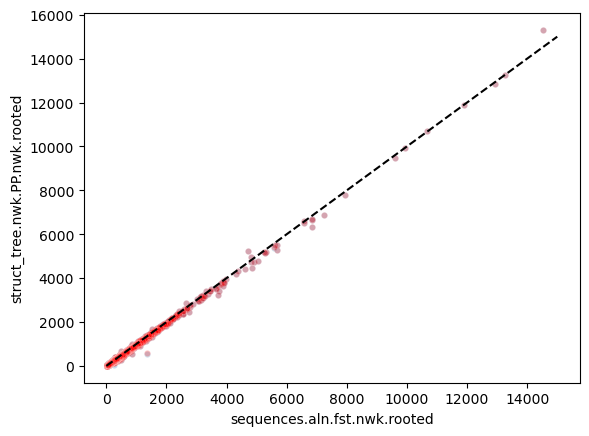

In [22]:
sns.scatterplot(tree_resdf, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s = 20 )
sns.scatterplot(tree_resdf, x = 'sequences.aln.fst.nwk.rooted', y='core_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 , c='r' )
from scipy.stats import wilcoxon

print(tree_resdf.delta.sum(), tree_resdf.delta_norm.sum(),wilcoxon(tree_resdf.delta))
sns.lineplot(x = [0,15000] , y = [0,15000] , linestyle='--' , c = 'k')

In [ ]:
    sns.violinplot(sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted']] , cut = 0 )


-65035
-138.47111078948316


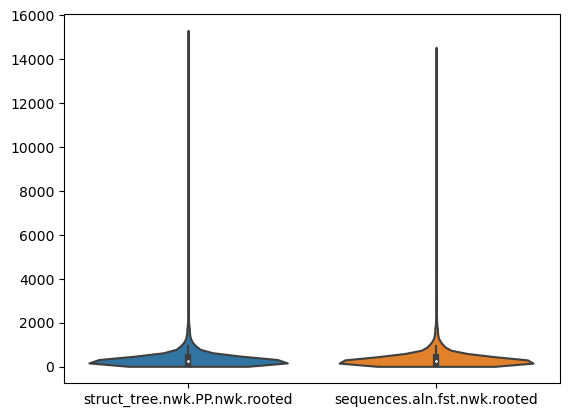

In [23]:
#sns.violinplot(resdf['delta_norm'])
sns.violinplot(tree_resdf[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']] , cut = 0)
print(tree_resdf['delta'].sum() )
print(tree_resdf['delta_norm'].sum() )

<AxesSubplot: >

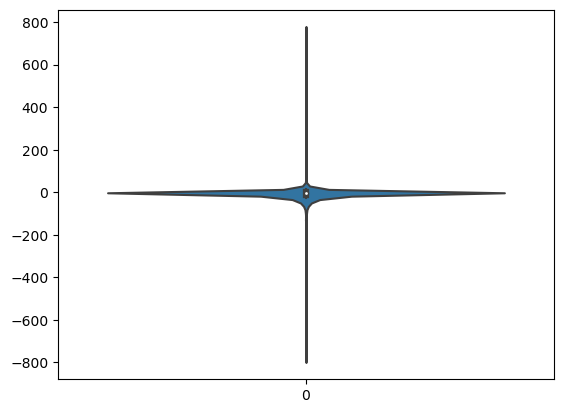

In [24]:
sns.violinplot(tree_resdf['delta'])

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
struct_tree.nwk.PP.nwk.rooted    73.455099
core_tree.nwk.PP.nwk.rooted      73.456621
sequences.aln.fst.nwk.rooted     73.225266
delta                             0.229833
max                              75.098935
delta_norm                        0.002770
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


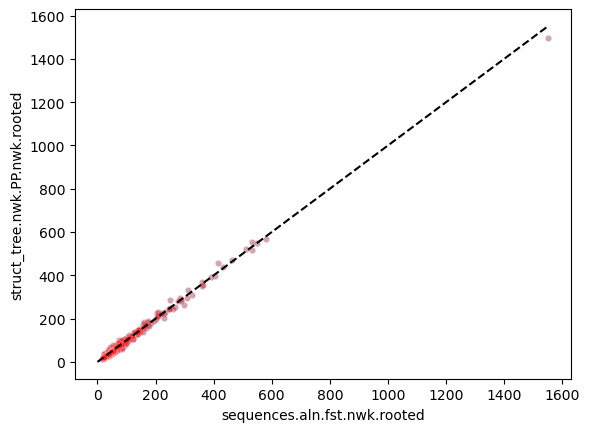

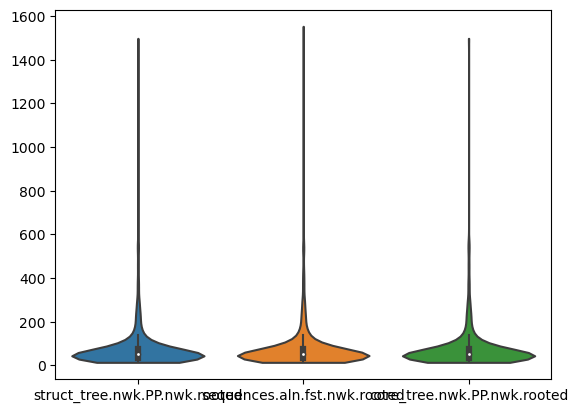

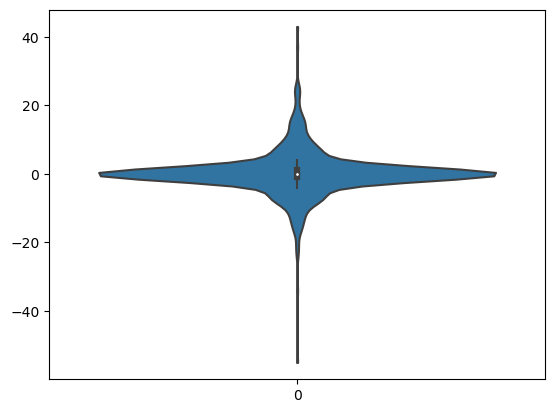

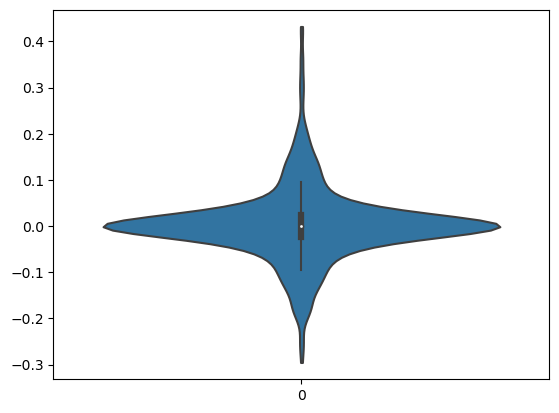

151 WilcoxonResult(statistic=44422.5, pvalue=0.6178605003753332)
1.8197588925547938 WilcoxonResult(statistic=45208.5, pvalue=0.8506301919154431)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/
struct_tree.nwk.PP.nwk.rooted    246.662026
core_tree.nwk.PP.nwk.rooted      246.631864
sequences.aln.fst.nwk.rooted     251.926527
delta                             -5.264501
max                              253.545244
delta_norm                        -0.016798
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


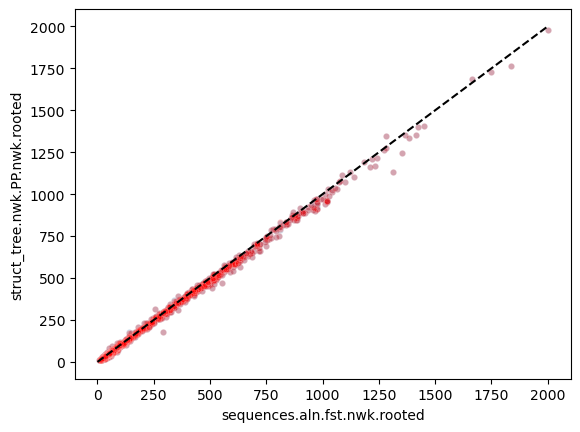

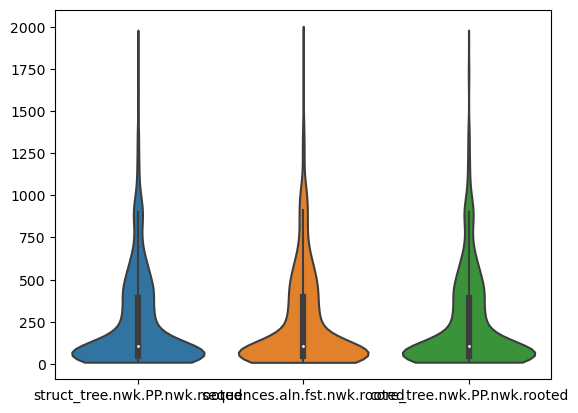

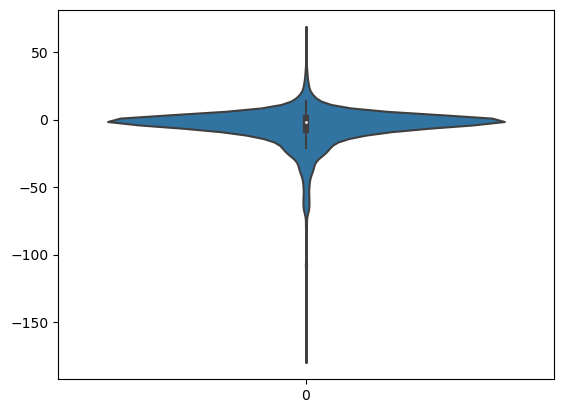

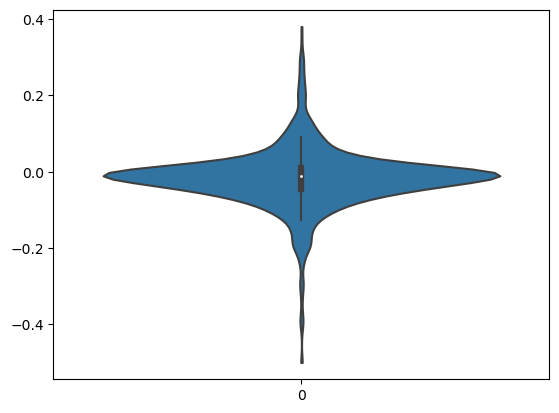

-6807 WilcoxonResult(statistic=161415.0, pvalue=1.0191735720945887e-44)
-21.71950626692426 WilcoxonResult(statistic=200611.5, pvalue=2.8828553952996364e-25)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/
struct_tree.nwk.PP.nwk.rooted    369.116967
core_tree.nwk.PP.nwk.rooted      369.157455
sequences.aln.fst.nwk.rooted     375.817481
delta                             -6.700514
max                              377.863111
delta_norm                        -0.016864
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


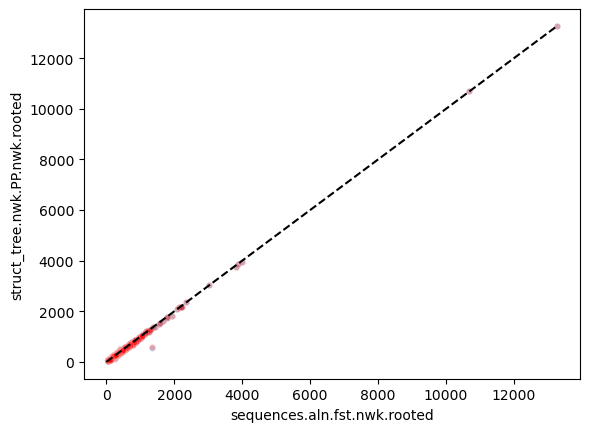

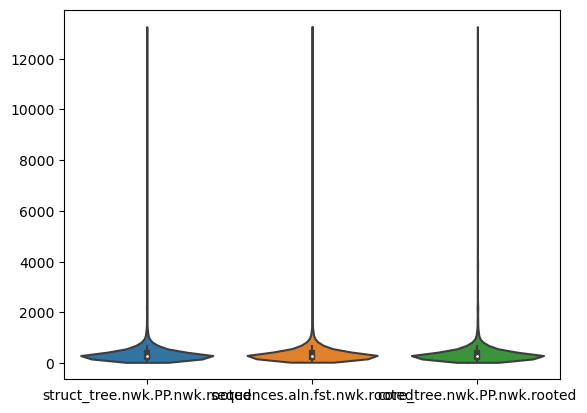

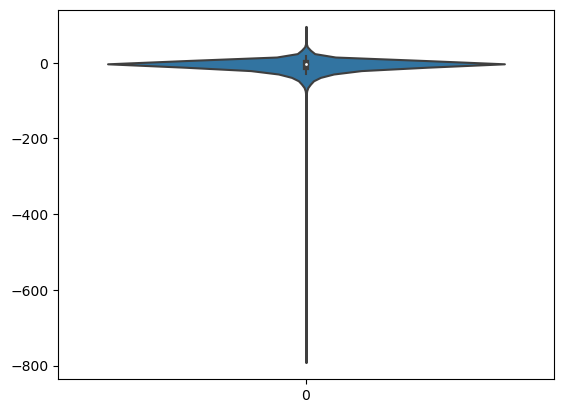

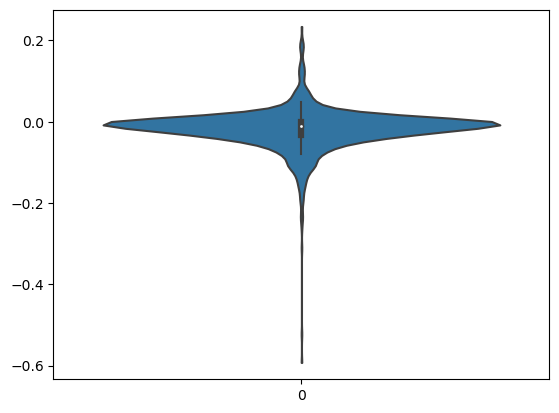

-10426 WilcoxonResult(statistic=211659.0, pvalue=1.4457182537044683e-67)
-26.240546664667058 WilcoxonResult(statistic=223131.5, pvalue=1.166157492999848e-61)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/
struct_tree.nwk.PP.nwk.rooted    415.114738
core_tree.nwk.PP.nwk.rooted      415.147379
sequences.aln.fst.nwk.rooted     417.486647
delta                             -2.371909
max                              420.727992
delta_norm                        -0.006058
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


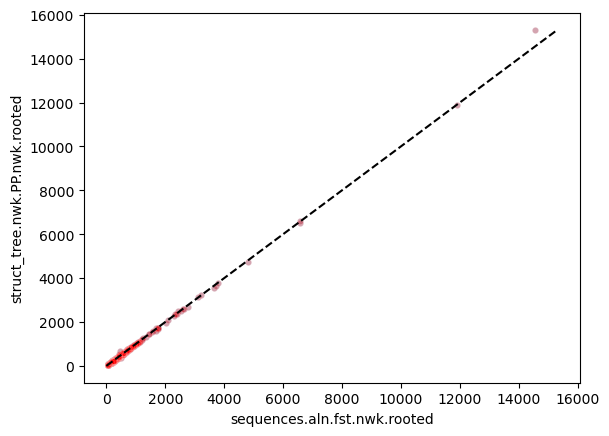

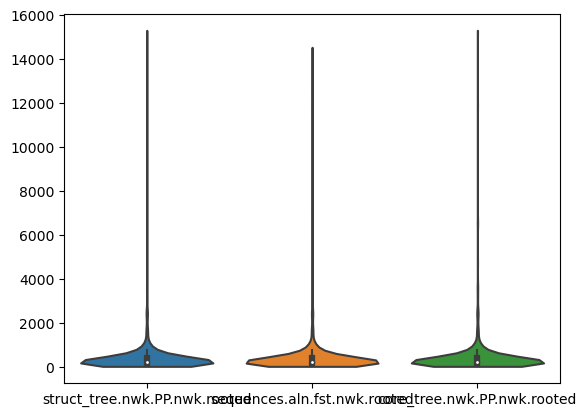

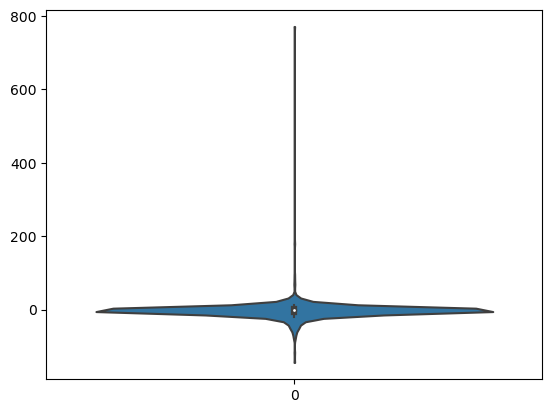

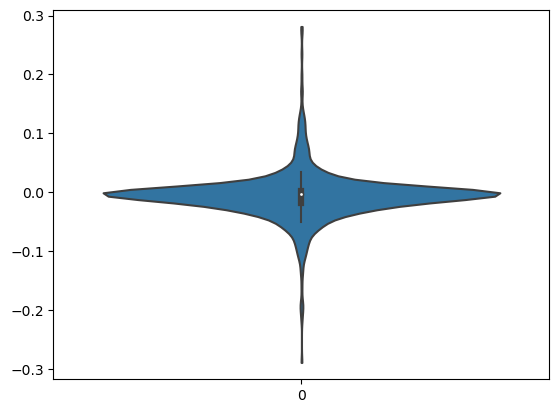

-2398 WilcoxonResult(statistic=100297.0, pvalue=1.217690342742138e-18)
-6.124724663431841 WilcoxonResult(statistic=103588.0, pvalue=1.0809406721212726e-16)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/
struct_tree.nwk.PP.nwk.rooted    96.176796
core_tree.nwk.PP.nwk.rooted      96.132597
sequences.aln.fst.nwk.rooted     97.121547
delta                            -0.944751
max                              97.751381
delta_norm                       -0.010116
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


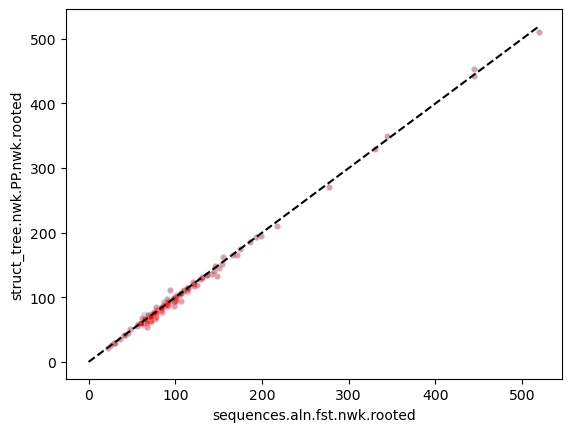

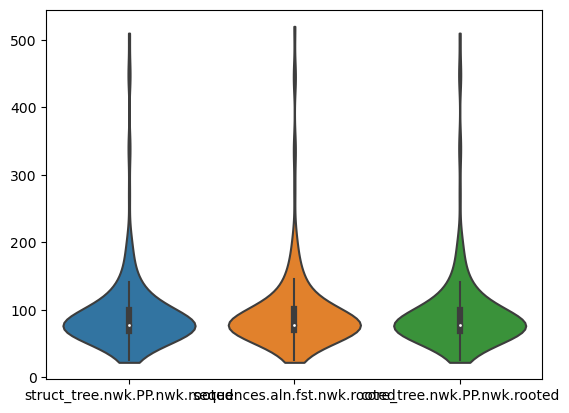

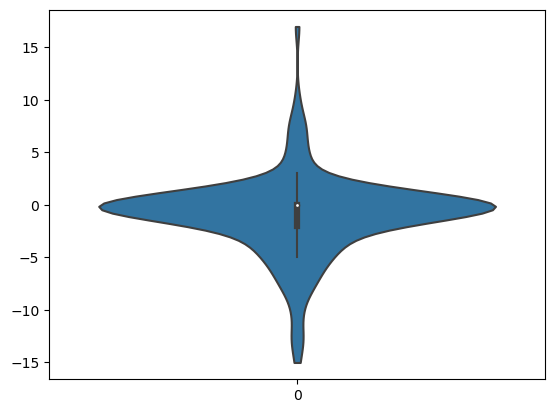

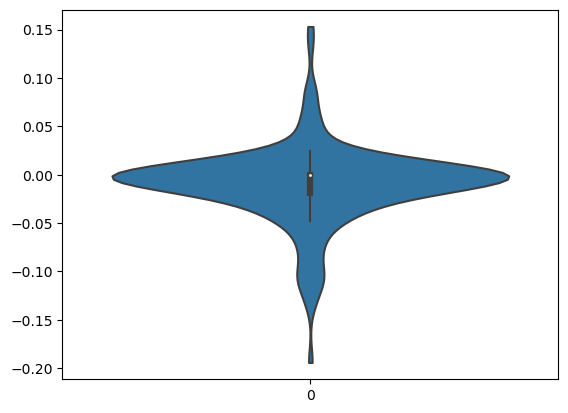

-171 WilcoxonResult(statistic=1682.0, pvalue=9.93582458689547e-05)
-1.830930182247622 WilcoxonResult(statistic=1695.5, pvalue=0.00013130595030209636)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/
struct_tree.nwk.PP.nwk.rooted    79.893939
core_tree.nwk.PP.nwk.rooted      79.893939
sequences.aln.fst.nwk.rooted     81.265152
delta                            -1.371212
max                              82.143939
delta_norm                       -0.017044
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


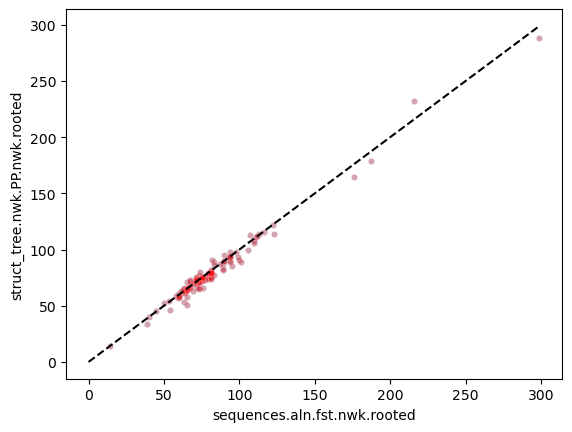

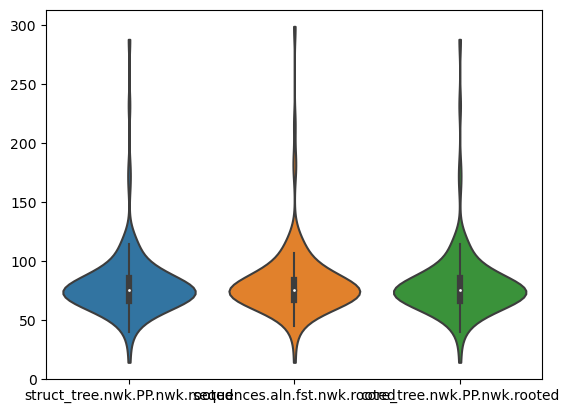

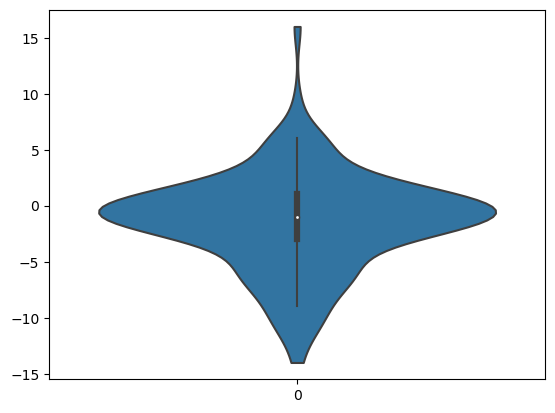

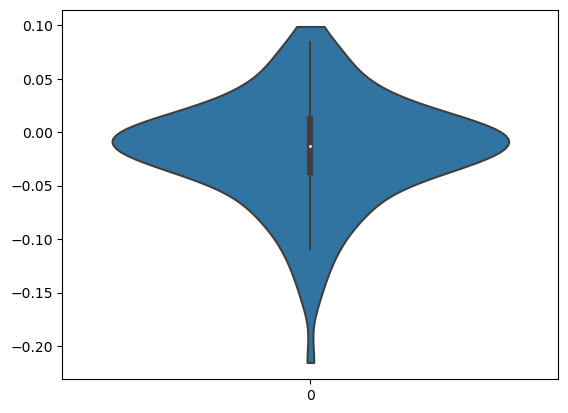

-181 WilcoxonResult(statistic=1656.0, pvalue=0.00018837509630559608)
-2.249847413229308 WilcoxonResult(statistic=1731.5, pvalue=0.0005018194050568486)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/
struct_tree.nwk.PP.nwk.rooted    377.915736
core_tree.nwk.PP.nwk.rooted      377.929949
sequences.aln.fst.nwk.rooted     382.732995
delta                             -4.817259
max                              384.832487
delta_norm                        -0.011454
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


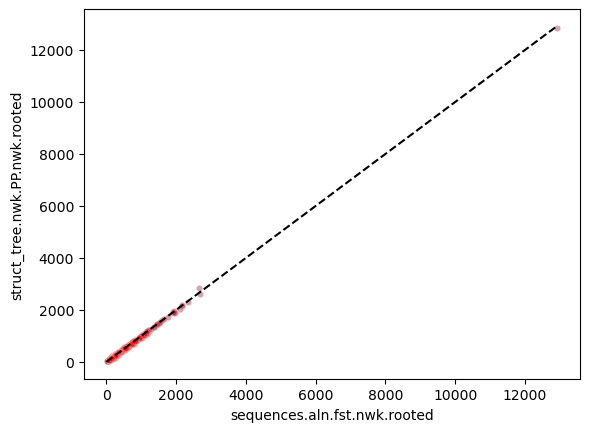

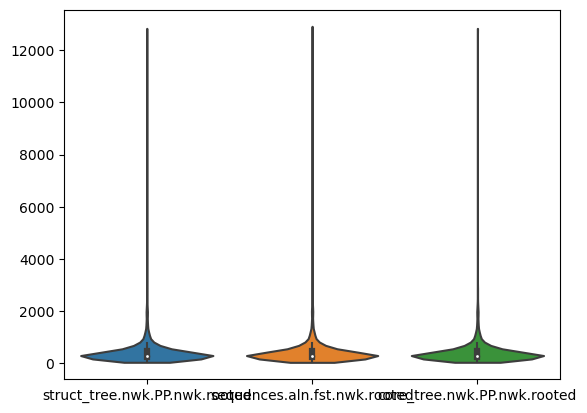

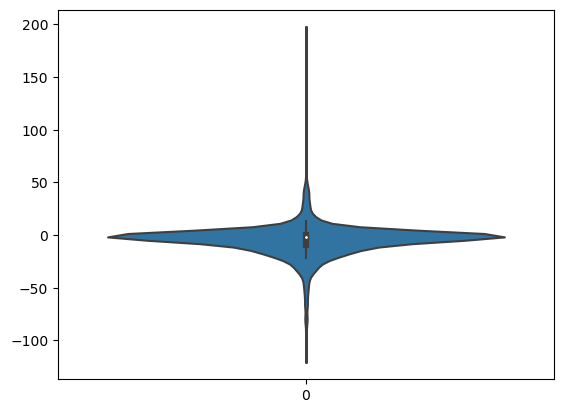

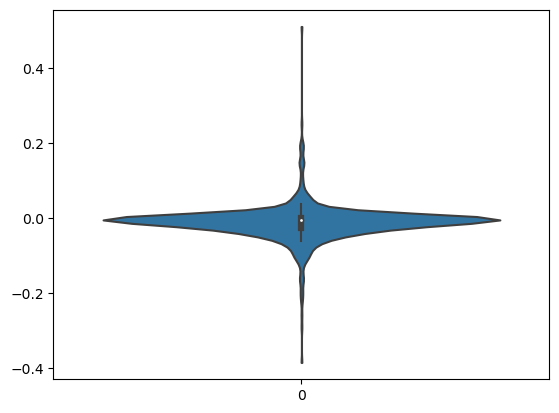

-4745 WilcoxonResult(statistic=72925.5, pvalue=1.5295405102348116e-37)
-11.282260028399016 WilcoxonResult(statistic=76060.5, pvalue=8.657553676387303e-35)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/
struct_tree.nwk.PP.nwk.rooted    490.977792
core_tree.nwk.PP.nwk.rooted      491.027919
sequences.aln.fst.nwk.rooted     503.813452
delta                            -12.835660
max                              505.878490
delta_norm                        -0.022476
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


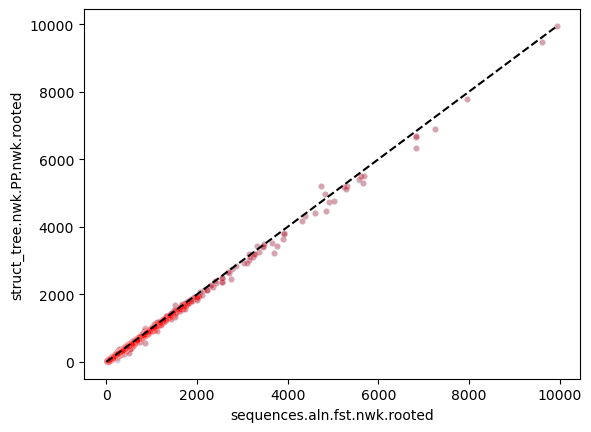

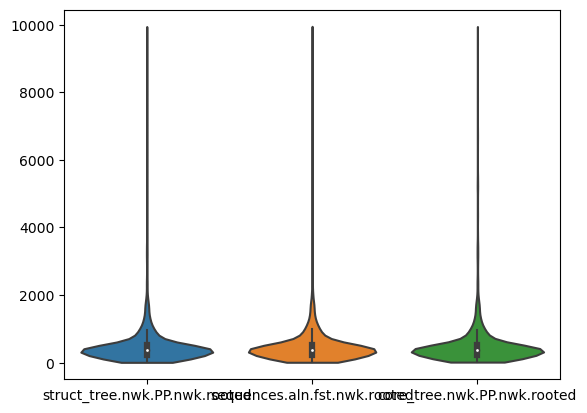

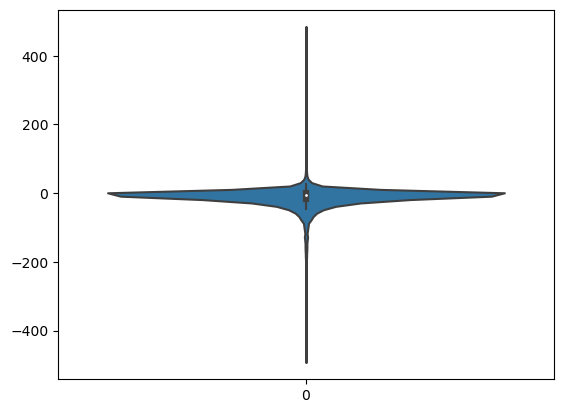

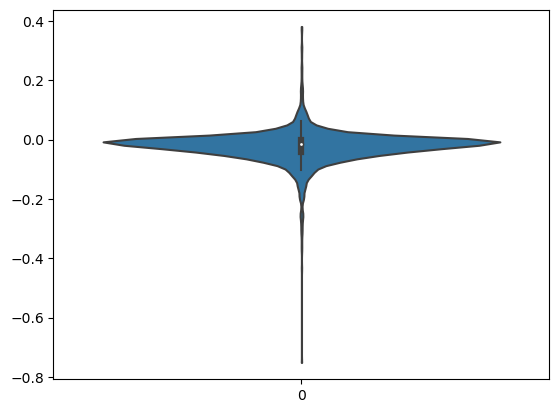

-40458 WilcoxonResult(statistic=605963.5, pvalue=1.4824048824815878e-217)
-70.84305446313886 WilcoxonResult(statistic=704917.5, pvalue=8.810072571382074e-187)


In [31]:
#sub = resdf[['sequences.aln.fst.nwk.rooted' , 'struct_tree.nwk.PP.nwk.rooted' ]]
from matplotlib import pyplot as plt

for folder in tree_resdf.clade.unique():
    print(folder)
    sub = tree_resdf[tree_resdf.clade == folder]
    print(sub.mean())
    
    maxval = sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']].max().max()
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 )
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='core_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 , c='r' )
    
    sns.lineplot(x = [0,maxval] , y = [0,maxval] , linestyle='--' , c = 'k')
    
    plt.show()
    sns.violinplot(sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted']] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta'] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta_norm'] , cut = 0 )
    plt.show()
    
    print( sub.delta.sum(), wilcoxon(sub.delta))
    print( sub.delta_norm.sum(), wilcoxon(sub.delta_norm))


    

In [32]:
#construct structure and sequence feature dataset

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'plddt.json' ) and os.path.isfile(folder + 'sequence_dataset.csv' ) :
            plddt_df = pd.read_json(folder + 'plddt.json').T
            if len(plddt_df)>0:
                try:
                    plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                    plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                    plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                    res[folder] = {}
                    for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                        descriptors = ret_description(plddt_df[col] , label = col)
                        for l in descriptors:
                            res[folder][l] = descriptors[l]
                    #add in some descriptors of the taxonomic spread and sequence set
                    seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                    res[folder]['nprots'] = len(seqdf)
                    cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                    union_all = cladesets[0]
                    intersection_all = cladesets[0]
                    for c in cladesets:
                        union_all = union_all.union(c)
                        intersection_all.intersection(c)
                    res[folder]['n_clades'] = len(union_all)
                    res[folder]['inter_clades'] = len(intersection_all)
                    res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                    res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
                except:
                    pass
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Tre

In [33]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                                      nobs_mean  nobs_max  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   807.250000       985   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   521.944444       811   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   401.434783       516   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...    64.357143        71   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   204.133333       215   
...                                                         ...       ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...  1041.034884      1191   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   446.782609       581   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   351.106061       480   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   384.966102       506   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   890.472222      1124   

                                                    nobs_min     nobs_var  

In [34]:
#add to the tree comparison data
tree_resdf = tree_resdf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1022   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            660   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [35]:
print(tree_resdf.columns)

Index(['struct_tree.nwk.PP.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted',
       'sequences.aln.fst.nwk.rooted', 'delta', 'max', 'delta_norm', 'clade',
       'HOG', 'nobs_mean', 'nobs_max', 'nobs_min', 'nobs_var', 'min_mean',
       'min_max', 'min_min', 'min_var', 'max_mean', 'max_max', 'max_min',
       'max_var', 'mean_mean', 'mean_max', 'mean_min', 'mean_var',
       'variance_mean', 'variance_max', 'variance_min', 'variance_var',
       'skewness_mean', 'skewness_max', 'skewness_min', 'skewness_var',
       'kurtosis_mean', 'kurtosis_max', 'kurtosis_min', 'kurtosis_var',
       'nprots', 'n_clades', 'inter_clades', 'inter/nc', 'nc/np'],
      dtype='object')


In [36]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [43]:
X, y = tree_resdf[['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np']], tree_resdf.delta_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 0.0042


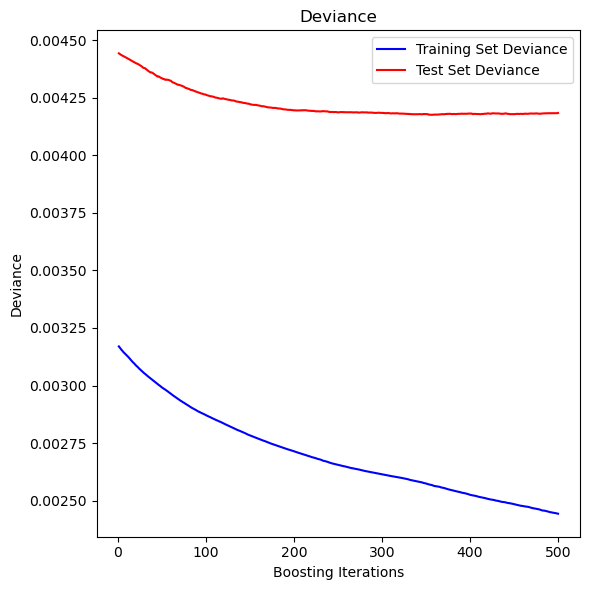

In [44]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

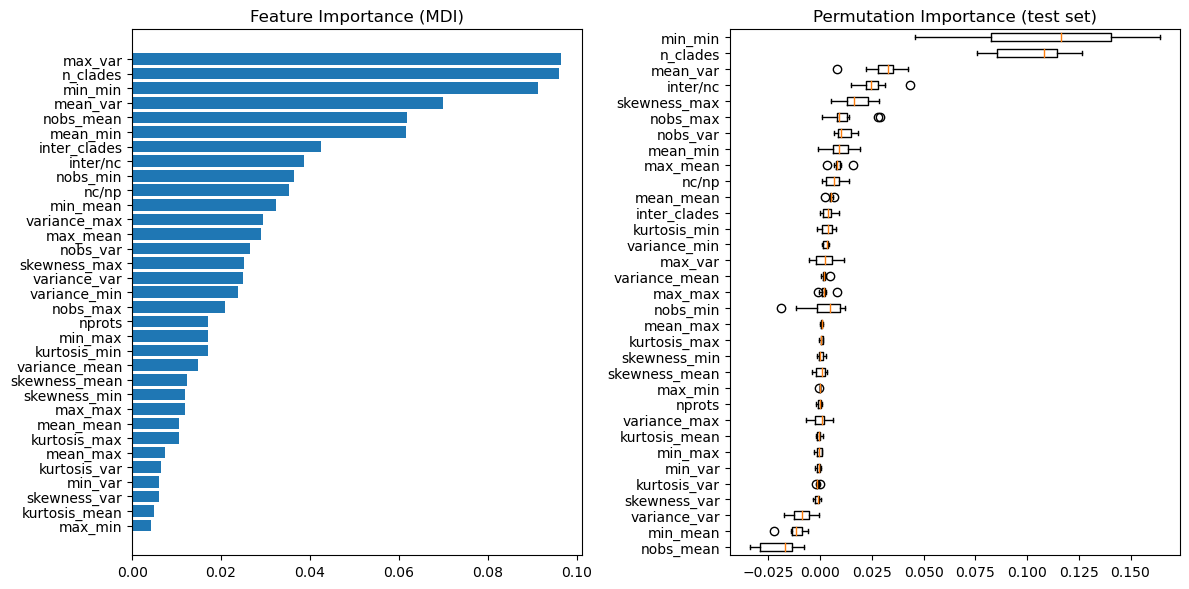

In [45]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()